<a href="https://colab.research.google.com/github/rfernandes29/mlusp/blob/main/aula04_02_regularizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overfitting e Underfitting

Tipicamente há 3 estados em que um modelo treinado pode estar:

- Bem ajustado
- Underfit (sub-ajustado)
- Overfit  (sobre-ajustado)

Modelos bem ajustados são aqueles que possuem boa capacidade de generalização, ou seja, apresentam bons resultados para dados novos, não vistos durante o treinamento.

Underfitting ocorre quando o modelo é simples demais para capturar padrões nos dados ou quando há problemas com os dados; Overfitting ocorre quando o modelo é complexo demais para os dados, e parece "memorizar" os dados de treinamento.

Nos dois casos os modelos não possuem boa capacidade de generalização, que é o que queremos.

Underfitting é tipicamente mais fácil de resolver: use um modelo mais complexo e cheque a qualidade dos seus dados; Overfitting requer conseguir mais dados (nem sempre possível) ou utilizar regularização.


### Estratégias comuns para regularização:

1. L1 (weight pruning)
2. L2 (weight decay)

- L1: $J(w) + \alpha \sum_{w \in \mathbf{w}} |w|$
- L2: $J(w) + \alpha \sum_{w \in \mathbf{w}} w^2$

As duas técnicas tornam o problema de otimização mais difícil, mas afetam o modelo de formas diferentes:

- L1 faz com que os valores de $\mathbf{w}$ menos importantes sejam zerados (\emph{weight pruning})
- L2 faz com que os valores de $\mathbf{w}$ sejam reduzidos tal que todos tenham uma contribuição mínima

Na prática:

- L1 gera modelos mais fáceis de interpretar, por possuírem menos pesos
- L2 gera modelos com desempenho melhor


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [15, 15]

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

#define função para criar plots com fronteiras de decisão
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if type(clf) == Sequential:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = (Z > 0.5).astype(int)
    else:
        Z = clf.predict_classes(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b, s=5)
    plt.axis('off')


#### Criação de dados de exemplo utilizando make_moons

In [ ]:
X, y = make_moons(n_samples=1000, random_state=42)
X = X + np.random.normal(0.0, 0.3, X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

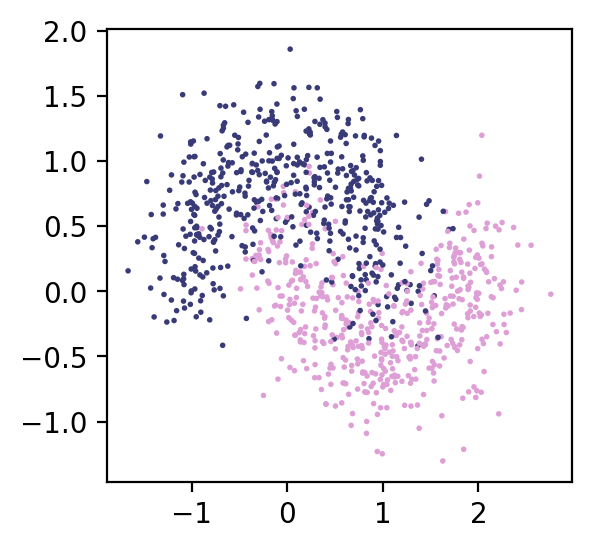

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.scatter(X[:,0], X[:,1], c=y, s=1, cmap=plt.cm.tab20b)
plt.show()


#### Modelo 1: Rede neural com 5 elementos, sem regularização

In [ ]:
m1 = Sequential()

m1.add(Dense(5, activation='relu', input_shape=(X.shape[1],)))
m1.add(Dense(1, activation='sigmoid'))

m1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time hist = m1.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.05)

print(m1.evaluate(X_test, y_test, verbose=0)[1])

Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 0.6068 - accuracy: 0.5281 - val_loss: 0.6100 - val_accuracy: 0.5667
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5927 - accuracy: 0.5561 - val_loss: 0.5970 - val_accuracy: 0.6000
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5801 - accuracy: 0.5895 - val_loss: 0.5856 - val_accuracy: 0.6000
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5690 - accuracy: 0.6246 - val_loss: 0.5746 - val_accuracy: 0.6333
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5592 - accuracy: 0.6544 - val_loss: 0.5646 - val_accuracy: 0.7000
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.6947 - val_loss: 0.5557 - val_accuracy: 0.7333
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5424 - accuracy: 0.7263 - val_loss: 0.5475 - val_accuracy: 0.8333
Epoch 8/10
18/18 [=

1562/1562 [==============================] - 3s 2ms/step


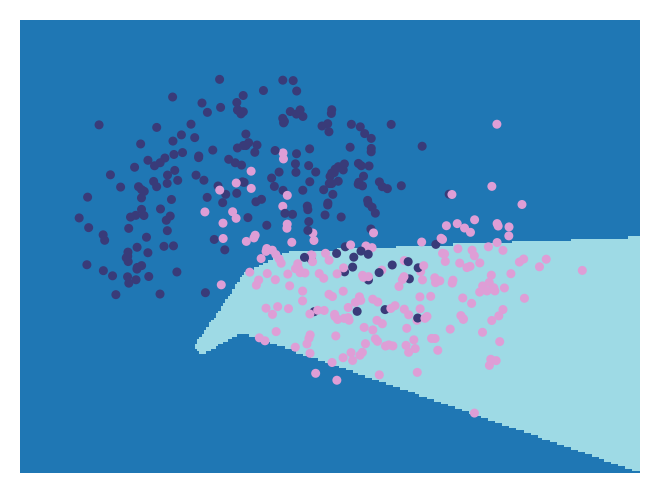

In [ ]:
plot_decision_boundary(m1, X_test, y_test)

#### Modelo 3: Rede neural com 5 camadas de 200 elementos cada, sem regularização

In [ ]:
m3 = Sequential()

m3.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(1, activation='sigmoid'))

m3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time hist = m3.fit(X_train, y_train, \
                    batch_size=32, epochs=20, verbose=1, validation_split=0.05)

print(m3.evaluate(X_test, y_test, verbose=0)[1])

Epoch 1/20
18/18 [==============================] - 2s 19ms/step - loss: 0.4826 - accuracy: 0.7860 - val_loss: 0.3594 - val_accuracy: 0.9000
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.8351 - val_loss: 0.3402 - val_accuracy: 0.9000
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 0.3255 - accuracy: 0.8491 - val_loss: 0.3151 - val_accuracy: 0.9000
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 0.3063 - accuracy: 0.8579 - val_loss: 0.3055 - val_accuracy: 0.9000
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.2825 - accuracy: 0.8789 - val_loss: 0.2720 - val_accuracy: 0.9000
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.8877 - val_loss: 0.2156 - val_accuracy: 0.9000
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.8965 - val_loss: 0.2697 - val_accuracy: 0.9000
Epoch 8/20
18/18 [=

1777/1777 [==============================] - 3s 2ms/step


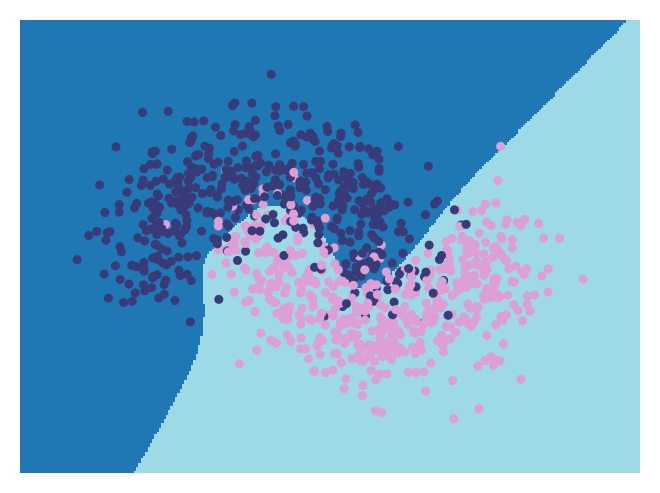

In [ ]:
plot_decision_boundary(m3, X, y)

1562/1562 [==============================] - 3s 2ms/step


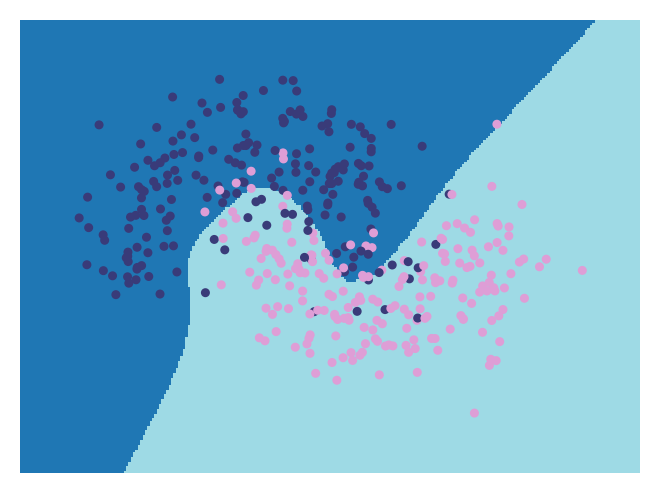

In [ ]:
plot_decision_boundary(m3, X_test, y_test)

#### Modelo 3: Rede neural com 5 camadas de 200 elementos cada, com regularização L2

In [ ]:
m_reg = Sequential()

m_reg.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(10.0)))

m_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time hist = m_reg.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.05)

print(m_reg.evaluate(X_test, y_test, verbose=0)[1])

Epoch 1/20
18/18 [==============================] - 2s 17ms/step - loss: 19.4680 - accuracy: 0.7912 - val_loss: 16.2997 - val_accuracy: 0.9000
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 14.0507 - accuracy: 0.8368 - val_loss: 11.7276 - val_accuracy: 0.9000
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 10.0215 - accuracy: 0.8561 - val_loss: 8.3373 - val_accuracy: 0.8667
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 7.0861 - accuracy: 0.8561 - val_loss: 5.8380 - val_accuracy: 0.9000
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 4.9622 - accuracy: 0.8632 - val_loss: 4.0673 - val_accuracy: 0.9000
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 3.4422 - accuracy: 0.8807 - val_loss: 2.8122 - val_accuracy: 0.9000
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 2.3762 - accuracy: 0.8965 - val_loss: 1.9497 - val_accuracy: 0.9000
Epoch 8/20
18/

1777/1777 [==============================] - 3s 2ms/step


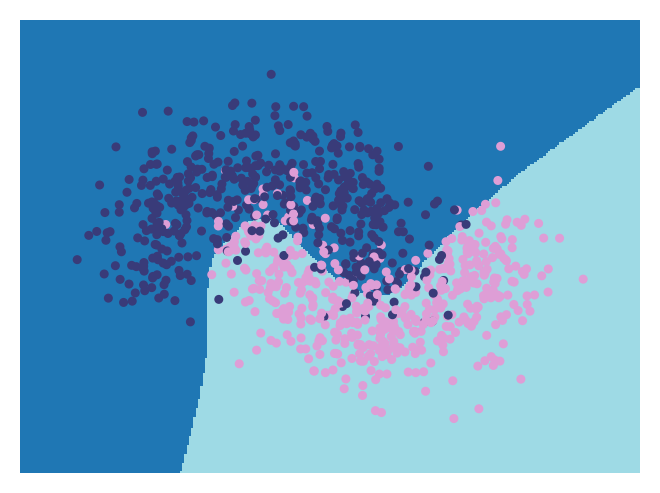

In [ ]:
plot_decision_boundary(m_reg, X, y)

1562/1562 [==============================] - 3s 2ms/step


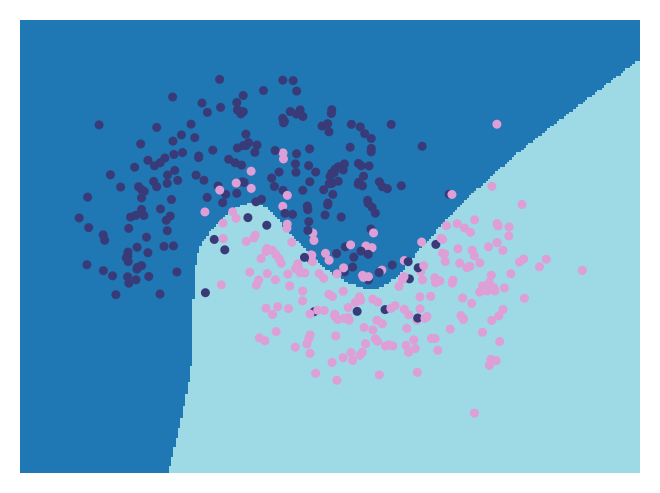

In [ ]:
plot_decision_boundary(m_reg, X_test, y_test)

### Explorações:

- Treinar por menos iterações (epochs)
- Adicionar mais dados